# Search: Path finding

Total Points: 10


The agent knows the layout of the maze (i.e., it is a fully observable, deterministic, discrete, known environment). To goal is to find a path through a maze from a given start state $S$ to a given goal state $G$. Here is the small example maze:

In [17]:
f = open("small_maze.txt", "r")
maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from pyTree.Tree import Tree as Tree

# from maze_helper.py
def parse_maze(maze_str, asInt=True):
    """Convert a maze as a string into a 2d numpy array"""
    maze = maze_str.split('\n')
    maze = np.array([[tile for tile in row] for row in maze if len(row) > 0])
    
    if asInt:
        maze[maze == ' '] = 0
        maze[maze == 'X'] = 1
        maze[maze == 'S'] = 2
        maze[maze == 'G'] = 3
        maze[maze == 'P'] = 4
        # Converts all string values to integers
        maze = maze.astype(int)
    
    return maze

# from maze_helper.py
# This is modified code I found on StackOverflow, at this link
# https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values
def show_maze(maze):
    """display a maze (numpy array)"""
    cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red'])
    bounds = [0, 1, 2, 3, 4, 5]
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1
    maze[maze == 'S'] = 2
    maze[maze == 'G'] = 3
    maze[maze == 'P'] = 4
    # Converts all string values to integers
    maze = maze.astype(np.int)
        
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)
    
    plt.show()

def run_example():
    for type in ['small', 'medium', 'large', 'open']:
        f = open(f"{type}_maze.txt", "r")    
        maze_str = f.read()
        print(maze_str)
            
        maze = parse_maze(maze_str)
        print(maze)
    
        show_maze(maze)

In [19]:
maze = parse_maze(maze_str, True)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

Position(0,0): 1
Position(8,1): 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ip

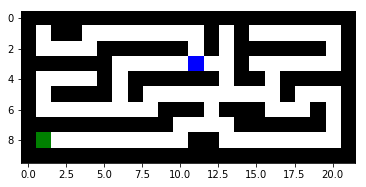

In [20]:
show_maze(maze)

## Tree structures

A basic tree implementation in Python is available at https://github.com/yoyzhou/pyTree (found by John Park).


# Tasks

Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Iterative deepening search
* Greedy best-first search
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), and the 
[open maze](open_maze.txt). 
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

* __Initial State:__ Start location within the maze (defined by state at loc = S)
* __Actions:__ Up, Down, Left, Right
* __Transition Model:__
* __Goal State:__ Reach goal location within the mast (definded by state at loc = G)
* __Path Cost:__ 1 Action = 1 Unit of Cost, find the path with the minimum number of actions needed to reach goal state

## Task 2: Breadth-first, Depth-first and iterative deepening search [4 points]

The maze contains the start and goal states. Define the other states as intersections. The actions are choosing which direction to go next. You need to write code (a function) that, given a current state and all the available actions finds the set of next possible states. Your search then starts with the start state and explores the maze until it finds the goal state.

* __Breadth-First__: frontier is first in, first out (FIFO) queue
* __Depth-First__: frontier is last in, first out (LIFO) queue
* __Iterative-Deepening Search:__ Depth first search, but with increasing cutoff depth values

In [108]:
maze

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [106]:
class BreadthFirstSearch():
    def __init__(self, maze):
        # get starting position
        self.tree = None
        self.travelledLocs = set()
        self.maze = self._parseMazeToInts(maze)
        self.frontierTracker = []
                           
    # from maze_helper.py
    @staticmethod
    def _parseMazeToInts(maze):
        """Convert a maze as a string into a 2d numpy array"""
        maze = maze_str.split('\n')
        maze = np.array([[tile for tile in row] for row in maze if len(row) > 0])
        maze[maze == ' '] = 0  # path
        maze[maze == 'X'] = 1  # border/barrier
        maze[maze == 'S'] = 2  # start position
        maze[maze == 'G'] = 3  # goal position
        maze[maze == 'P'] = 4  # ??? 
        maze = maze.astype(int)
        return maze
    
    def _getStartLoc(self):
        startLoc = np.argwhere(self.maze == 2)[0]
        x = startLoc[1]
        y = startLoc[0]
        return y, x
        
    def _getChoices(self, y, x):
        # method to return all the possible locations to go to next
        self.travelledLocs.add((y, x))
        positionList = [
            (y + 1, x),  # North
            (y - 1, x),  # South
            (y, x - 1),  # West
            (y, x + 1),  # East
        ]
        choices = []
        for position in positionList:
            if position in travelledLocs: # ignore where I've already been
                continue
            state = self.maze[position]
            if state == 0:  # path
                choices.append(position)
            if state == 3:  # goal
                return 'goal'
        # choices will be an empty list at a dead end
        return choices
    
    def breadthFirstSearch(self):
        y, x = self._getStartLocs(self.maze)
        self.tree = Tree('Starting Position ({y}, {x})'.format(x=x,y=y))
        self.frontierTracker = [frontier]
        nodeCounter = 0
        while 1:
            newFrontier = []
            print(frontier)
            choices = self._getChoices(y, x)
            while (len(choices) == 1):
                # keep getting new choices until a node is found
                y, x = choices[1], choices[0]
                choices = self._getChoices(y, x)
            if choices == 'goal':
                break
            if not choices:  # dead end
                print('dead end')
                continue
            # need to update frontier 
            for choice in choices:
                name = 'Node {0}'.format(nodeCounter)
                node = Tree(data={"name": name, "loc": option})

            frontierTracker.append(newFrontier)
            frontier = newFrontier



[(2, 11), (3, 10), (3, 12)]
[(1, 11), (3, 9), (3, 13)]
[(1, 10), (3, 8), (4, 13), (2, 13)]
[(1, 9), (3, 7), (5, 13), (1, 13)]
dead end
[(1, 8), (3, 6), (5, 12), (5, 14)]
[(1, 7), (4, 6), (6, 12), (5, 11), (5, 15)]
[(1, 6), (5, 6), (7, 12), (5, 10), (5, 16)]
[(1, 5), (6, 6), (7, 11), (7, 13), (5, 9), (6, 16), (4, 16)]
[(1, 4), (6, 5), (6, 7), (7, 10), (8, 13), (5, 8), (6, 17), (3, 16)]
[(2, 4), (6, 4), (6, 8), (8, 10), (8, 14), (6, 8), (6, 18), (3, 15), (3, 17)]
dead end
dead end
dead end
[(2, 3), (6, 3), (8, 9), (8, 15), (5, 18), (3, 18)]
[(2, 2), (6, 2), (8, 8), (8, 16), (5, 19), (3, 19)]
[(2, 1), (6, 1), (8, 7), (8, 17), (5, 20), (3, 20)]
[(1, 1), (5, 1), (8, 6), (8, 18), (6, 20), (2, 20)]
dead end
[(4, 1), (8, 5), (8, 19), (7, 20), (1, 20)]
[(4, 2), (8, 4), (8, 20), (8, 20), (1, 19)]
dead end
dead end
[(4, 3), (8, 3), (1, 18)]
[(4, 4), (8, 2), (1, 17)]
dead end
found goal!


In [107]:
for frontier in frontierTracker:
    print(frontier)

[(2, 11), (3, 10), (3, 12)]
[(1, 11), (3, 9), (3, 13)]
[(1, 10), (3, 8), (4, 13), (2, 13)]
[(1, 9), (3, 7), (5, 13), (1, 13)]
[(1, 8), (3, 6), (5, 12), (5, 14)]
[(1, 7), (4, 6), (6, 12), (5, 11), (5, 15)]
[(1, 6), (5, 6), (7, 12), (5, 10), (5, 16)]
[(1, 5), (6, 6), (7, 11), (7, 13), (5, 9), (6, 16), (4, 16)]
[(1, 4), (6, 5), (6, 7), (7, 10), (8, 13), (5, 8), (6, 17), (3, 16)]
[(2, 4), (6, 4), (6, 8), (8, 10), (8, 14), (6, 8), (6, 18), (3, 15), (3, 17)]
[(2, 3), (6, 3), (8, 9), (8, 15), (5, 18), (3, 18)]
[(2, 2), (6, 2), (8, 8), (8, 16), (5, 19), (3, 19)]
[(2, 1), (6, 1), (8, 7), (8, 17), (5, 20), (3, 20)]
[(1, 1), (5, 1), (8, 6), (8, 18), (6, 20), (2, 20)]
[(4, 1), (8, 5), (8, 19), (7, 20), (1, 20)]
[(4, 2), (8, 4), (8, 20), (8, 20), (1, 19)]
[(4, 3), (8, 3), (1, 18)]
[(4, 4), (8, 2), (1, 17)]
[]


In [96]:
maze

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

Are your implementations complete and optimal? If not, what needs to be changed to make them complete or optimal? What is the time and space complexity of each?

In [18]:
# Discussion

## Task 3: Greedy best-first search [2 points]

Assume you have a GPS device that shows you your position in terms of x and y coordinates and you also know the coordinates of the goal. You can estimate the distance from your current position to the goal using a Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. 

In [19]:
# Your code goes here

Is this implementation complete and optimal? What is the time and space complexity?

In [20]:
# Discussion

## Task 4: A* Search [3 points]

Use again the GPS-based heuristic function.

In [21]:
# Your code goes here

Is this implementation complete and optimal? What is the time and space complexity?

In [22]:
# Discussion

## Bonus Tasks [+1 point]

We use intersections as states and the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [ ]:
# Your code goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [23]:
# Your code goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [24]:
# Your code goes here